# Problema 6
La fuerza efectiva que realiza el viento sobre el mástil de un bote de velas puede aproximarse por la siguiente
expresión:

$ F = \int^{30}_{0} 200 \frac{z}{z+5} e^{\frac{-2z}{300}} dz $

(donde F está dada en lbs y las distancias en pies).
Estime, utilizando los métodos de trapecios y de Simpson 1/3, cuánto vale la fuerza total y dónde será el punto
de acción efectiva de esta fuerza ( $ d = \frac{1}{F} \int^{30}_{0} z f(z) dz$ ).

Utilice varios tamaños de paso de integración, entre 5 y 0.05 pies, y estudie la convergencia de cada método

In [83]:
import numpy as np
import matplotlib.pyplot as plt
a=0 ; b=30; h=0.5; I=0
f = lambda z: 200 * (z/(5+z)) * np.exp((-2*z)/300)

# Trapecios

In [84]:
def trapecios(a,b,h,f):
    """[a,b]: intervalo de integración
        h: step
        f: funcion a integrar """
    n=(b-a)/h
    x=np.linspace(a, b, int(n))
    F=np.array([f(x[i]) for i in range(len(x))])
    I=-h*(F[0]+F[len(F)-1])/2
    for i in range(len(x)):
        I+= h* F[i]
    return I


In [85]:
trapecios(a,b,h,f)

3558.717064341175

In [86]:
n=(b-a)/h; x=np.linspace(a, b, int(n)+1)
n, len(x)
np.logspace(1,6,10).astype(int)

array([     10,      35,     129,     464,    1668,    5994,   21544,
         77426,  278255, 1000000])

# Simpson 1/3

In [143]:
def simpson(a,b,h,f):
    n=(b-a)/h
    x=np.linspace(a, b, int(n))
    H=(f(x[0])+f(x[-1]))
    for i in range(1,int(n)):    # si pongo range(1,len(x)) me da igual a xavi,
        H+=(2*f(x[i]))                      # pero estaria sumando el f(x_n) multiplicado *2/3
        if i%2==0:                 # y ya lo tenia sumado cuando definí I
            H+=(4*f(x[i]))
    I= ((b-a)/(n-1))* H/3
    return I

In [144]:
simpson(a,b,0.00005,f)

4826.539301659632

# Punto de acción efectivo

In [97]:
d1 = lambda z:  (1/trapecios(a,b,h,f)) * z * 200 * (z/(5+z)) * np.exp((-2*z)/300)
d = lambda z:  (1/simpson(a,b,h,f)) * z * 200 * (z/(5+z)) * np.exp((-2*z)/300)
p = simpson(a,b,h,d)
k = trapecios(a,b,h,d1)
print(f'El punto de acción efectivo es: \n  simpson {p}\n  trapecios {k}')

El punto de acción efectivo es: 
  simpson 16.921985054677673
  trapecios 16.788256224071183


# Estudio de convergencia

In [77]:
met = [trapecios,simpson]

[3225.652391718398, 3513.945364852469, 3591.6568604700255, 3604.2838580868197, 3617.7296768661836, 3619.29696259255, 3619.732937281986, 3619.854213868527, 3619.887958081024, 3619.8973475094867]


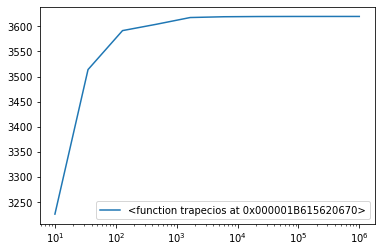

[3775.743291796279, 4652.664865586095, 4782.0504721131165, 4803.9367350289585, 4821.4791285388355, 4825.129153962153, 4826.143697325435, 4826.425855174106, 4826.514446722753, 4826.526201968422]


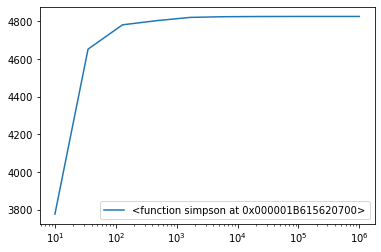

In [78]:
t=np.logspace(1,6,10).astype(int)
for j in met:
    H=[]
    for i in t:
        x=np.linspace(a, b, i)
        H.append(j(a,b,(b-a)/i, f))
    print(H)
    plt.semilogx(t,H, label=str(j))
    plt.legend()
    plt.show()
    

In [123]:
len(x)

1000000

In [124]:
x=np.linspace(a, b, 2)
x

array([ 0., 30.])

In [187]:
trap= [trapecios(a,b,(b-a)/t[i], f) for i in range(1,10)]
trap

[3617.442956788917,
 3619.7195251611834,
 3612.0853992188636,
 3619.8998819342496,
 3619.9008833552207,
 3619.9009609068253,
 3619.90096690978,
 3619.9009673745063,
 3619.9009674106605]

In [171]:
t[2]

129

In [165]:
(b-a)/464

0.06465517241379311